<a href="https://colab.research.google.com/github/pazLevi/Deep-learning-projects/blob/main/clothes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Mounte to google drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/fashion classification '

*imports*

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import *
import matplotlib.pyplot as plt
import cv2

*load data*

In [ ]:
train = pd.read_csv(PATH+'/fashion-mnist_train.csv')
test = pd.read_csv(PATH+'/fashion-mnist_test.csv')

*show the data*

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


*dictionary for the labels*

In [ ]:
dict_labels = {0:"T-shirt/top",1: 'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

*Organize the Data*

In [ ]:
train_image = train.drop('label',axis=1)
train_label = train['label']

test_image = test.drop('label',axis=1)
test_label = test['label']

*Organize the shape of the images*

In [ ]:
print(f'The shape of singel image \033[1m before: {train_image.loc[0].shape}\033[0m')
data_image_train = train_image.to_numpy().reshape([60000,28,28,1])
data_image_test = test_image.to_numpy().reshape([10000,28,28,1])
print(f'The shape of singel image \033[1m after: {data_image_train[0].shape}\033[0m')

The shape of singel image  before: (784,)
The shape of singel image  after: (28, 28, 1)


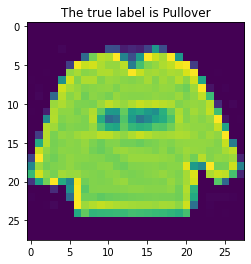

In [ ]:
def show_image(image,label,prediction=None):
  text = f"The true label is {dict_labels[label]}"
  if  np.array(prediction).size != 1:
    text += f'\nThe predict label is {dict_labels[prediction[i]]}'
  plt.title(text)
  plt.imshow(image.reshape(28,28))

show_image(data_image_train[0],train_label[0])

## Introduce the balance the data

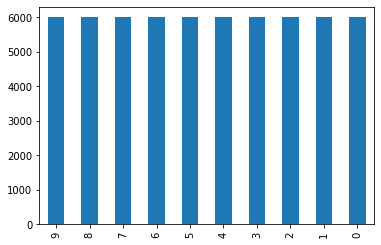

In [ ]:
train_label.value_counts().plot(kind='bar')

# Show the data

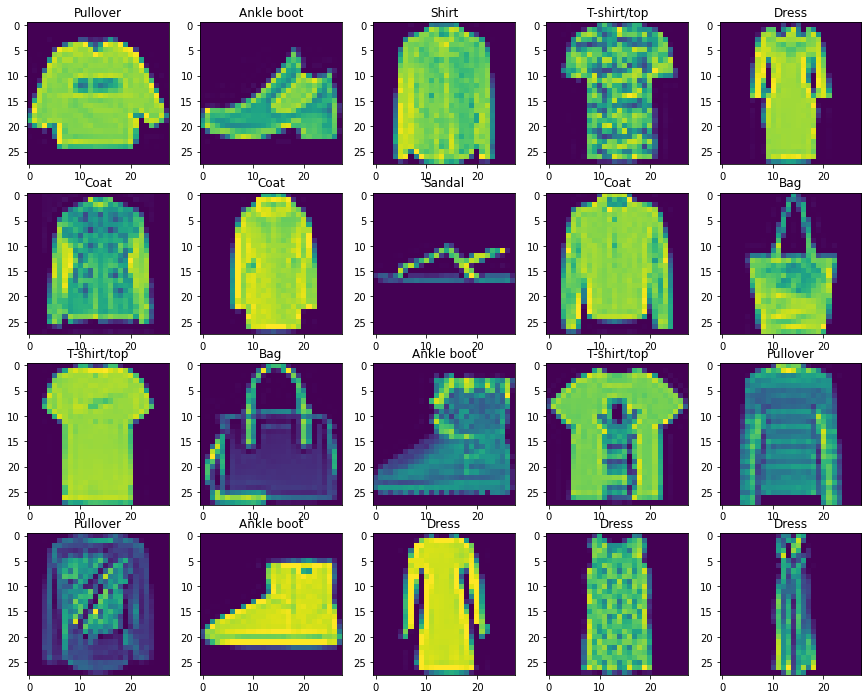

In [ ]:
plt.figure(figsize=(15,12))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.grid(False)
  show_image(data_image_train[i],train_label[i])

In [ ]:
data_image_test = data_image_test / 255.0
data_image_train = data_image_train / 255.0

# Model

#### simple nn

In [ ]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


#### cnn nn
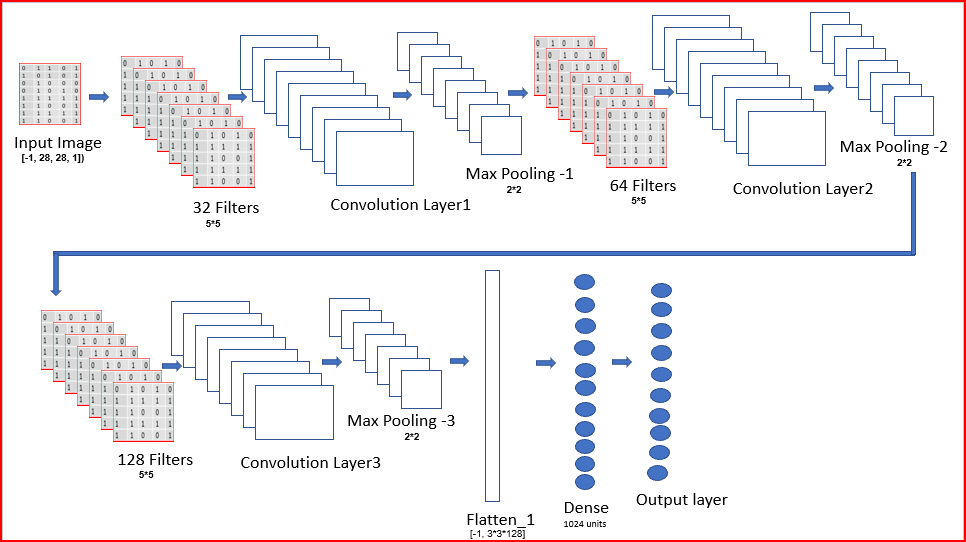

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_46 (Dense)             (None, 10)              

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(data_image_train,train_label,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7019 - accuracy: 0.8220
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3400 - accuracy: 0.8753
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3025 - accuracy: 0.8882
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2781 - accuracy: 0.8955
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2564 - accuracy: 0.9044
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2414 - accuracy: 0.9098
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2254 - accuracy: 0.9156
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2125 - accuracy: 0.9201
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1972 - accuracy: 0.9262
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.18

In [ ]:
model.evaluate(data_image_test,test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.4887 - accuracy: 0.9053


[0.4887159764766693, 0.9053000211715698]

In [ ]:
np.argmax(model.predict(data_image_test),axis=1)

array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
from sklearn import metrics 
matrix = metrics.confusion_matrix(test_label, model.predict(data_image_test).argmax(axis=1))

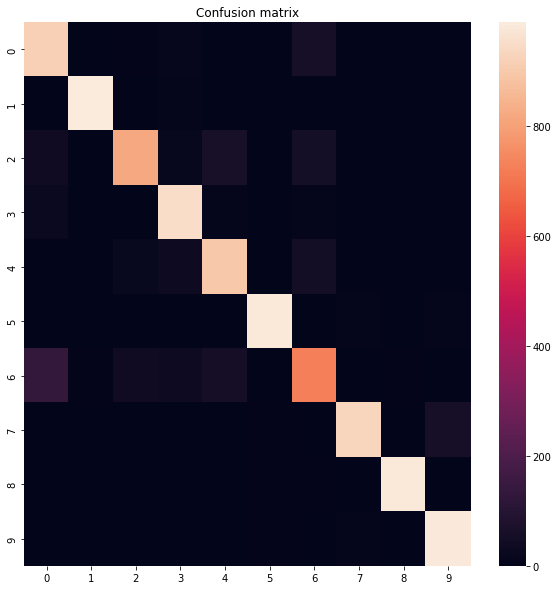

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,10))
plt.title('Confusion matrix')
sn.heatmap(matrix)
plt.show()

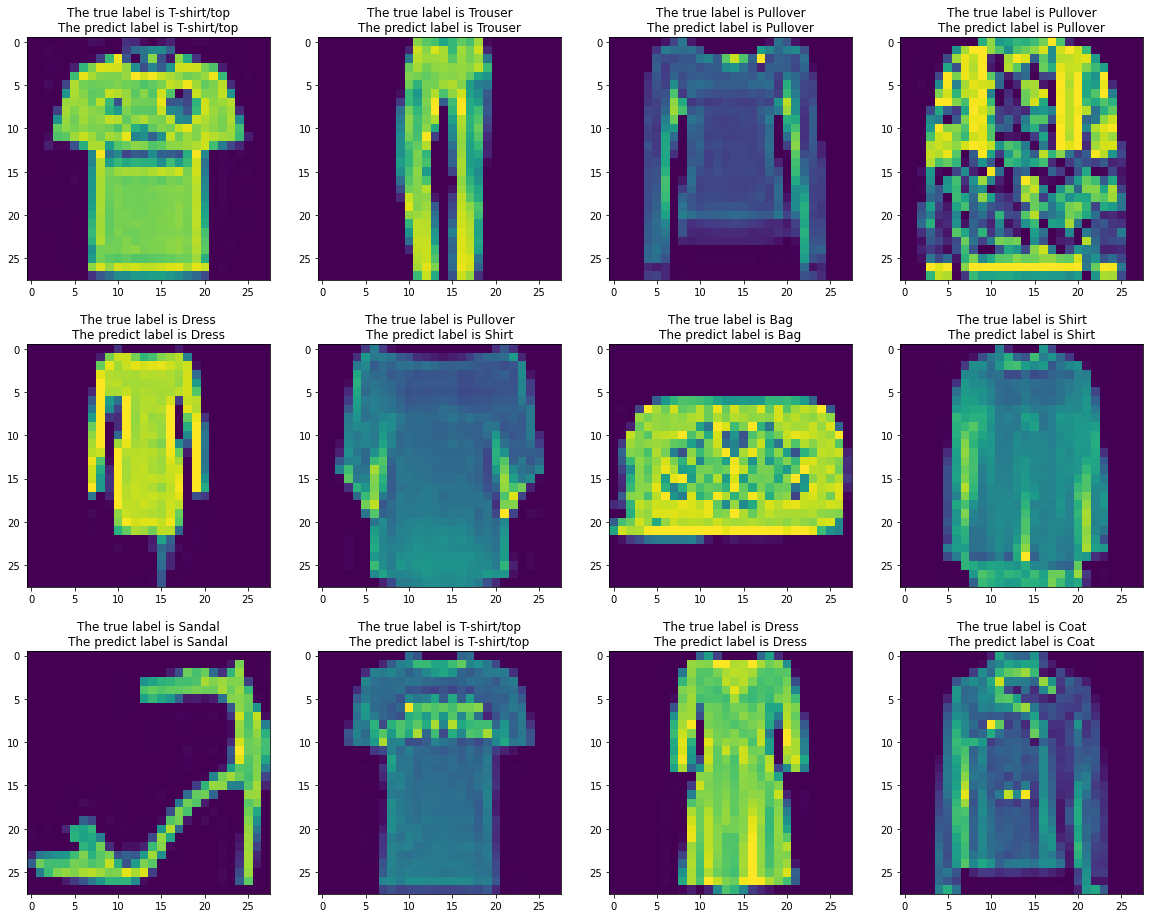

In [ ]:
plt.figure(figsize=(20,16))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.grid(False)
  show_image(data_image_test[i],test_label[i],model.predict(data_image_test).argmax(axis=1))